# Test of Sci-kit Learn

## Upload the data
In this case, will try from csv

In [131]:
import pandas as pd
import datetime

In [132]:
df = pd.read_csv("dropped_cols_month_earthquake.csv", index_col=0)
df

,id,tsunami,felt,time,latitude,longitude,depth,mag,magType,gap,net,updated,place,type,locationSource
0,nn00818986,0,NaN,2021-08-19T02:53:29.951Z,38.541200,-119.463900,3.60,1.30,ml,58.29,nn,2021-08-19T02:56:56.695Z,"3 km NNE of Walker, California",earthquake,nn
1,ci40014776,0,NaN,2021-08-19T02:49:35.880Z,35.896667,-117.729167,4.48,0.72,ml,72.00,ci,2021-08-19T02:53:05.273Z,"17km ESE of Little Lake, CA",earthquake,ci
2,ak021am2mkg5,0,NaN,2021-08-19T02:49:14.046Z,59.865100,-153.176400,102.60,1.60,ml,NaN,ak,2021-08-19T03:02:14.791Z,"52 km E of Pedro Bay, Alaska",earthquake,ak
3,nc73611791,0,NaN,2021-08-19T02:46:16.400Z,38.784668,-122.751000,0.33,1.03,md,84.00,nc,2021-08-19T02:47:54.191Z,"1km NNE of The Geysers, CA",earthquake,nc
4,ak021am2l4yc,0,NaN,2021-08-19T02:42:46.880Z,56.657400,-157.265100,0.50,2.90,ml,NaN,ak,2021-08-19T02:50:26.938Z,"80 km ENE of Chignik, Alaska",earthquake,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13318,uw61755891,0,NaN,2021-07-20T03:11:29.020Z,42.057167,-120.038000,2.26,1.82,ml,164.00,uw,2021-07-20T05:14:16.500Z,"22 km ENE of New Pine Creek, Oregon",earthquake,uw
13319,us7000enlk,0,NaN,2021-07-20T03:08:10.671Z,-12.226100,167.045400,235.32,4.50,mb,122.00,us,2021-08-13T03:59:37.040Z,"190 km NNW of Sola, Vanuatu",earthquake,us
13320,ak02198guo30,0,NaN,2021-07-20T03:08:03.959Z,59.160800,-149.073100,30.10,1.90,ml,NaN,ak,2021-07-20T03:20:40.799Z,"103 km SSE of Lowell Point, Alaska",earthquake,ak
13321,uw61755886,0,NaN,2021-07-20T03:07:04.750Z,43.155500,-122.949667,-0.52,0.92,md,304.00,uw,2021-07-20T18:34:14.680Z,"20 km SE of Glide, Oregon",explosion,uw


In [133]:
#https://stackoverflow.com/questions/54313463/pandas-datetime-to-unix-timestamp-seconds
df['Unix Time'] = pd.to_datetime(df['time']).astype(int) / 10**9
df.head(5)

/Users/rosaicelaroman/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


,id,tsunami,felt,time,latitude,longitude,depth,mag,magType,gap,net,updated,place,type,locationSource,Unix Time
0,nn00818986,0,NaN,2021-08-19T02:53:29.951Z,38.541200,-119.463900,3.60,1.30,ml,58.29,nn,2021-08-19T02:56:56.695Z,"3 km NNE of Walker, California",earthquake,nn,1.629342e+09
1,ci40014776,0,NaN,2021-08-19T02:49:35.880Z,35.896667,-117.729167,4.48,0.72,ml,72.00,ci,2021-08-19T02:53:05.273Z,"17km ESE of Little Lake, CA",earthquake,ci,1.629341e+09
2,ak021am2mkg5,0,NaN,2021-08-19T02:49:14.046Z,59.865100,-153.176400,102.60,1.60,ml,NaN,ak,2021-08-19T03:02:14.791Z,"52 km E of Pedro Bay, Alaska",earthquake,ak,1.629341e+09
3,nc73611791,0,NaN,2021-08-19T02:46:16.400Z,38.784668,-122.751000,0.33,1.03,md,84.00,nc,2021-08-19T02:47:54.191Z,"1km NNE of The Geysers, CA",earthquake,nc,1.629341e+09
4,ak021am2l4yc,0,NaN,2021-08-19T02:42:46.880Z,56.657400,-157.265100,0.50,2.90,ml,NaN,ak,2021-08-19T02:50:26.938Z,"80 km ENE of Chignik, Alaska",earthquake,ak,1.629341e+09


In [134]:
for index, row in df.iterrows():
    if df.loc[index, 'type'] == 'earthquake':
        df.loc[index,'grouped_type'] = 1
    else:
        df.loc[index,'grouped_type'] = 0
df.head(5)

,id,tsunami,felt,time,latitude,longitude,depth,mag,magType,gap,net,updated,place,type,locationSource,Unix Time,grouped_type
0,nn00818986,0,NaN,2021-08-19T02:53:29.951Z,38.541200,-119.463900,3.60,1.30,ml,58.29,nn,2021-08-19T02:56:56.695Z,"3 km NNE of Walker, California",earthquake,nn,1.629342e+09,1.0
1,ci40014776,0,NaN,2021-08-19T02:49:35.880Z,35.896667,-117.729167,4.48,0.72,ml,72.00,ci,2021-08-19T02:53:05.273Z,"17km ESE of Little Lake, CA",earthquake,ci,1.629341e+09,1.0
2,ak021am2mkg5,0,NaN,2021-08-19T02:49:14.046Z,59.865100,-153.176400,102.60,1.60,ml,NaN,ak,2021-08-19T03:02:14.791Z,"52 km E of Pedro Bay, Alaska",earthquake,ak,1.629341e+09,1.0
3,nc73611791,0,NaN,2021-08-19T02:46:16.400Z,38.784668,-122.751000,0.33,1.03,md,84.00,nc,2021-08-19T02:47:54.191Z,"1km NNE of The Geysers, CA",earthquake,nc,1.629341e+09,1.0
4,ak021am2l4yc,0,NaN,2021-08-19T02:42:46.880Z,56.657400,-157.265100,0.50,2.90,ml,NaN,ak,2021-08-19T02:50:26.938Z,"80 km ENE of Chignik, Alaska",earthquake,ak,1.629341e+09,1.0


In [135]:
cleaned_df = df.drop(columns=['id', 'felt', 'time', 'magType','net', 'updated', 'place', 'type', 'locationSource', 'gap'])
cleaned_df

,tsunami,latitude,longitude,depth,mag,Unix Time,grouped_type
0,0,38.541200,-119.463900,3.60,1.30,1.629342e+09,1.0
1,0,35.896667,-117.729167,4.48,0.72,1.629341e+09,1.0
2,0,59.865100,-153.176400,102.60,1.60,1.629341e+09,1.0
3,0,38.784668,-122.751000,0.33,1.03,1.629341e+09,1.0
4,0,56.657400,-157.265100,0.50,2.90,1.629341e+09,1.0
...,...,...,...,...,...,...,...
13318,0,42.057167,-120.038000,2.26,1.82,1.626751e+09,1.0
13319,0,-12.226100,167.045400,235.32,4.50,1.626750e+09,1.0
13320,0,59.160800,-149.073100,30.10,1.90,1.626750e+09,1.0
13321,0,43.155500,-122.949667,-0.52,0.92,1.626750e+09,0.0


In [136]:
cleaned_df = cleaned_df.dropna()
cleaned_df

,tsunami,latitude,longitude,depth,mag,Unix Time,grouped_type
0,0,38.541200,-119.463900,3.60,1.30,1.629342e+09,1.0
1,0,35.896667,-117.729167,4.48,0.72,1.629341e+09,1.0
2,0,59.865100,-153.176400,102.60,1.60,1.629341e+09,1.0
3,0,38.784668,-122.751000,0.33,1.03,1.629341e+09,1.0
4,0,56.657400,-157.265100,0.50,2.90,1.629341e+09,1.0
...,...,...,...,...,...,...,...
13318,0,42.057167,-120.038000,2.26,1.82,1.626751e+09,1.0
13319,0,-12.226100,167.045400,235.32,4.50,1.626750e+09,1.0
13320,0,59.160800,-149.073100,30.10,1.90,1.626750e+09,1.0
13321,0,43.155500,-122.949667,-0.52,0.92,1.626750e+09,0.0


In [137]:
cleaned_df.shape

(13323, 7)

In [138]:
cleaned_df.describe()

,tsunami,latitude,longitude,depth,mag,Unix Time,grouped_type
count,13323.000000,13323.000000,13323.000000,13323.000000,13323.000000,1.332300e+04,13323.000000
mean,0.001201,38.682805,-120.693767,18.946017,1.566803,1.627946e+09,0.980335
std,0.034635,20.171567,56.216876,43.958085,1.246161,7.078442e+05,0.138852
min,0.000000,-65.407300,-179.981800,-10.000000,-1.430000,1.626750e+09,0.000000
25%,0.000000,33.820583,-154.644983,3.510000,0.780000,1.627376e+09,1.000000
50%,0.000000,38.535400,-121.529333,7.480000,1.310000,1.627897e+09,1.000000
75%,0.000000,52.309167,-116.737417,15.700000,2.040000,1.628536e+09,1.000000
max,1.000000,85.231300,179.968900,666.950000,8.200000,1.629342e+09,1.000000


In [167]:
import numpy as np

# import sklearn and random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [168]:
dep = np.array(cleaned_df[['mag']])

ind = cleaned_df.drop('mag', axis = 1)
# ind = cleaned_df.drop('depth', axis = 1)

ind_list = list(ind.columns)

data = np.array(ind)

In [141]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(ind, dep, test_size = 0.25, random_state = 42)

In [142]:
print('Training x Shape:', train_x.shape)
print('Training y Shape:', train_y.shape)
print('Testing x Shape:', test_x.shape)
print('Testing y Shape:', test_y.shape)

Training x Shape: (9992, 6)
Training y Shape: (9992, 1)
Testing x Shape: (3331, 6)
Testing y Shape: (3331, 1)


In [143]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(train_x, train_y)
y_pred = model.predict(test_x)
mse = mean_squared_error(test_y,y_pred)

r2 = r2_score(test_y, y_pred)
score = model.score(test_x, test_y)


print("\tMean Squared Error:", mse, end = ", ")
print("\tR2 score:", r2, end = ", ")
print("\tModel score:", score)

/Users/rosaicelaroman/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


	Mean Squared Error: 0.26941517078958527, 	R2 score: 0.814886890411498, 	Model score: 0.814886890411498


In [144]:
#https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Random%20Forest%20Explained.ipynb

In [145]:
#improve model
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, min_samples_split = 2, min_samples_leaf = 1)


In [146]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = model.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree_mag.dot', feature_names = ind_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_mag.dot')

# Write graph to a png file
graph.write_png('tree_mag.png')

In [147]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_x, train_y)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_mag.dot', feature_names = ind_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_mag.dot')

graph.write_png('small_tree_mag.png')

/Users/rosaicelaroman/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [148]:
print(y_pred)
predictions = y_pred.tolist()
actual = test_y.tolist()
actual_list = [item[0] for item in actual]
# print(actual_list)


[2.88    0.4744  1.18125 ... 0.8763  4.5235  0.16345]


In [149]:
mag_pred = pd.DataFrame({"Prediction": predictions, "Actual": actual_list})
mag_pred

,Prediction,Actual
0,2.88000,1.50
1,0.47440,1.22
2,1.18125,1.44
3,2.52760,2.70
4,0.71605,0.71
...,...,...
3326,0.42315,0.24
3327,4.64450,4.80
3328,0.87630,0.35
3329,4.52350,4.50


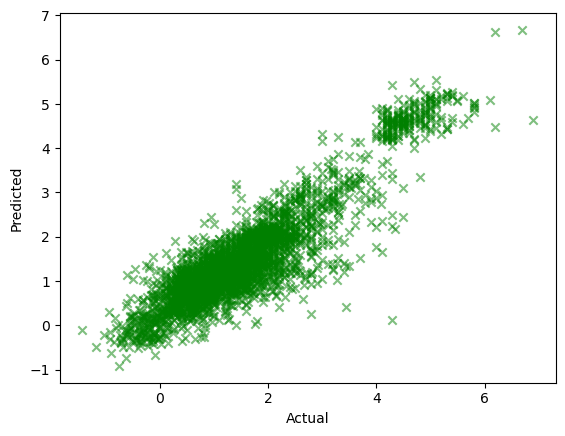

In [150]:
plt.scatter(actual_list, predictions, c="g", alpha=0.5, marker='x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
# plt.legend(loc='upper left')
plt.show()

In [151]:
mag_pred.to_csv('mag_prediction_dec_tree.csv')

## Depth Prediction

In [152]:
dep2 = np.array(cleaned_df[['depth']])

# ind = cleaned_df.drop('mag', axis = 1)
ind2 = cleaned_df.drop('depth', axis = 1)

ind_list2 = list(ind.columns)

data2 = np.array(ind)

In [153]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(ind2, dep2, test_size = 0.25, random_state = 42)

In [154]:
print('Training x Shape:', train_x.shape)
print('Training y Shape:', train_y.shape)
print('Testing x Shape:', test_x.shape)
print('Testing y Shape:', test_y.shape)

Training x Shape: (9992, 6)
Training y Shape: (9992, 1)
Testing x Shape: (3331, 6)
Testing y Shape: (3331, 1)


In [176]:
# https://www.kaggle.com/pierrejeanne/earthquakes-1965-2016-eda-and-ts-prediction
import warnings
warnings.filterwarnings('ignore')

scores = []

for i in range(1,50):
    model = RandomForestRegressor(n_estimators=i+1, random_state=42)
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    mse = mean_squared_error(test_y,y_pred)

    r2 = r2_score(test_y, y_pred)
    score = model.score(test_x, test_y)
    estimators = i+1
    scores.append(score)

    print("n_estimators={}:".format(estimators))
    print("\tMean Squared Error:", mse, end = ", ")
    print("\tR2 score:", r2, end = ", ")
    print("\tModel score:", score)

n_estimators=2:
	Mean Squared Error: 698.7139539227636, 	R2 score: 0.5592331702894864, 	Model score: 0.5592331702894864
n_estimators=3:
	Mean Squared Error: 533.9409152289836, 	R2 score: 0.6631762638531414, 	Model score: 0.6631762638531414
n_estimators=4:
	Mean Squared Error: 488.60068270496816, 	R2 score: 0.6917780549519876, 	Model score: 0.6917780549519876
n_estimators=5:
	Mean Squared Error: 485.6446668771947, 	R2 score: 0.6936427861737802, 	Model score: 0.6936427861737802
n_estimators=6:
	Mean Squared Error: 467.04343577511185, 	R2 score: 0.7053769237497473, 	Model score: 0.7053769237497473
n_estimators=7:
	Mean Squared Error: 463.58137198021393, 	R2 score: 0.7075608831147572, 	Model score: 0.7075608831147572
n_estimators=8:
	Mean Squared Error: 468.9917680550671, 	R2 score: 0.7041478653669324, 	Model score: 0.7041478653669324
n_estimators=9:
	Mean Squared Error: 466.04187176589903, 	R2 score: 0.7060087362255314, 	Model score: 0.7060087362255314
n_estimators=10:
	Mean Squared Error

In [177]:
max_score = max(scores)
print(max_score)

0.7436940389667818


In [183]:
import warnings
warnings.filterwarnings('ignore')

best_score = max_score

for i in range(1,100):
    model = RandomForestRegressor(n_estimators=i+1, random_state=42, criterion='mse', max_depth= None, min_samples_split = 2, min_samples_leaf = 1)
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    mse = mean_squared_error(test_y,y_pred)

    r2 = r2_score(test_y, y_pred)
    score = model.score(test_x, test_y)
    estimators = i+1
    current_score = score

    print("n_estimators={}:".format(estimators))
    print("\tMean Squared Error:", mse, end = ", ")
    print("\tR2 score:", r2, end = ", ")
    print("\tModel score:", score)
    if current_score > best_score:
        best_score = current_score
        best_model = model
        print('Improvement found!')


n_estimators=2:
	Mean Squared Error: 698.7139539227636, 	R2 score: 0.5592331702894864, 	Model score: 0.5592331702894864
n_estimators=3:
	Mean Squared Error: 533.9409152289836, 	R2 score: 0.6631762638531414, 	Model score: 0.6631762638531414
n_estimators=4:
	Mean Squared Error: 488.60068270496816, 	R2 score: 0.6917780549519876, 	Model score: 0.6917780549519876
n_estimators=5:
	Mean Squared Error: 485.6446668771947, 	R2 score: 0.6936427861737802, 	Model score: 0.6936427861737802
n_estimators=6:
	Mean Squared Error: 467.04343577511185, 	R2 score: 0.7053769237497473, 	Model score: 0.7053769237497473
n_estimators=7:
	Mean Squared Error: 463.58137198021393, 	R2 score: 0.7075608831147572, 	Model score: 0.7075608831147572
n_estimators=8:
	Mean Squared Error: 468.9917680550671, 	R2 score: 0.7041478653669324, 	Model score: 0.7041478653669324
n_estimators=9:
	Mean Squared Error: 466.04187176589903, 	R2 score: 0.7060087362255314, 	Model score: 0.7060087362255314
n_estimators=10:
	Mean Squared Error

In [184]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = best_model.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree_depth.dot', feature_names = ind_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_depth.dot')

# Write graph to a png file
graph.write_png('tree_depth.png')

In [186]:
rf_small = RandomForestRegressor(n_estimators=15, max_depth = 5, random_state=42)
rf_small.fit(train_x, train_y)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_depth.dot', feature_names = ind_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_depth.dot')

graph.write_png('small_tree_depth.png')

In [187]:
print(y_pred)
predictions = y_pred.tolist()
actual = test_y.tolist()
actual_list = [item[0] for item in actual]

[20.717   4.3514  4.7581 ...  1.465  59.401  10.8631]


In [188]:
depth_pred = pd.DataFrame({"Prediction": predictions, "Actual": actual_list})
depth_pred

,Prediction,Actual
0,20.7170,26.70
1,4.3514,4.49
2,4.7581,4.10
3,21.3004,77.40
4,10.6255,16.11
...,...,...
3326,7.9337,7.75
3327,14.8341,19.22
3328,1.4650,0.59
3329,59.4010,78.02


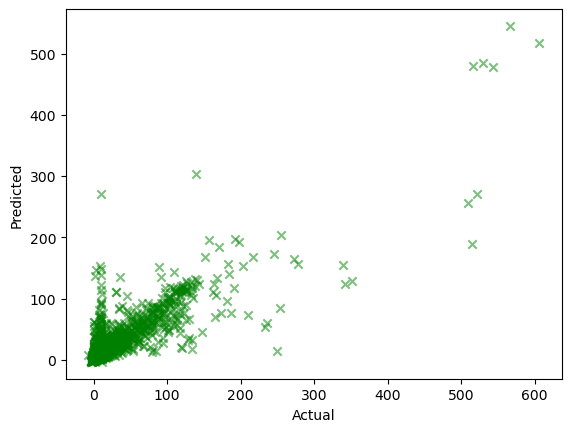

In [189]:
plt.scatter(actual_list, predictions, c="g", alpha=0.5, marker='x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
# plt.legend(loc='upper left')
plt.show()

In [190]:
depth_pred.to_csv('depth_prediction_dec_tree.csv')